# Augmentation considering density

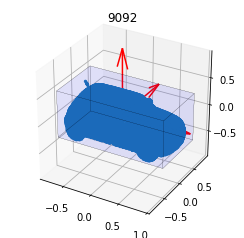

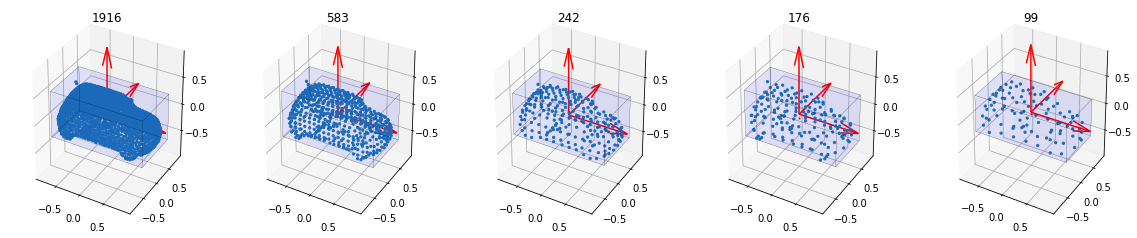

In [2]:
import numpy as np
import os
import pcl

from visualization import *

pc = np.load("/media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/pointcloud_from_stl/car_np_point_align_align_surface_points/car_0037_align_align_se.npy")

pc -= np.mean(pc, axis = 0)
pc /= np.max(abs(pc))


density_list = [0.05, 0.1, 0.15, 0.2, 0.25]

def augmentation_density(pc, density_list):
    
    aug_pc_list = []
    
    for d in density_list:
        
        pcl_pc = pcl.PointCloud(pc.copy().astype(np.float32))
        vgf = pcl_pc.make_voxel_grid_filter()
        vgf.set_leaf_size(d, d, d)
        pcl_pc = vgf.filter()

        aug_pc = np.asarray(pcl_pc)
        
        aug_pc_list.append(aug_pc)

    return aug_pc_list
    
## Original data
%matplotlib inline
fig = plt.figure(figsize = (4,4))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_title("{}".format(len(pc)))
display_point_cloud_box_ax_test(ax, pc)
plt.show()

## Augmentation 
aug_pc_list = augmentation_density(pc, density_list)
len_ap = len(aug_pc_list)

## Plot
%matplotlib inline

fig = plt.figure(figsize = (len_ap*4,4))

for i in range(len_ap):
    ax = fig.add_subplot(1,len_ap,1 + i, projection='3d')
    ax.set_title("{}".format(len(aug_pc_list[i])))
    display_point_cloud_box_ax_test(ax, aug_pc_list[i])
plt.show()



## Run all point cloud

In [3]:
import os

import numpy as np


""" file path """
root_path = os.path.abspath('./dataset/point_dataset/3_occlu/car/')
out_path = os.path.abspath('./dataset/point_dataset/4_dense/car')
try:
    if not(os.path.isdir(out_path)):
        os.makedirs(os.path.join(out_path))
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!!!!!")
        raise
    
    
""" find ".npy" files """
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

            
""" run labeling """

density_list = [0.05, 0.1, 0.15, 0.2, 0.25]

for i in range ( 0, len(fname)):
    
    pc = np.load(fname[i])
    
    pc_aug = augmentation_density(pc.copy(), density_list)
    pc_aug.append(pc)
    
    for j in range( len( pc_aug) ):
        
        out_data_name = fname[i].split('.')[0].split('/')[-1]
        out_data_path = os.path.join(out_path, out_data_name + "_aug_d_{:03d}".format(j))
        np.save(out_data_path, pc_aug[j] )    
        print "!!save file:", out_data_path
        print "!!number:", j

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0000_align_se_aug_000_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0000_align_se_aug_000_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0000_align_se_aug_000_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0000_align_se_aug_000_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0000_align_se_aug_000_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0000_align_se_aug_000_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0003_align_se_aug_014_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0003_align_se_aug_014_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0003_align_se_aug_014_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0003_align_se_aug_015_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0003_align_se_aug_015_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0003_align_se_aug_015_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0004_align_se_aug_018_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0004_align_se_aug_018_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0004_align_se_aug_018_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0004_align_se_aug_018_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0004_align_se_aug_018_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0004_align_se_aug_019_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0011_align_se_aug_001_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0011_align_se_aug_001_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0011_align_se_aug_001_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0011_align_se_aug_001_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0011_align_se_aug_002_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0011_align_se_aug_002_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0018_align_se_aug_016_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0018_align_se_aug_016_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0018_align_se_aug_016_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0018_align_se_aug_016_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0018_align_se_aug_016_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0018_align_se_aug_016_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0037_align_se_aug_017_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0037_align_se_aug_017_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0037_align_se_aug_017_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0037_align_se_aug_017_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0037_align_se_aug_017_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0037_align_se_aug_017_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0068_align_se_aug_005_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0068_align_se_aug_005_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0068_align_se_aug_005_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0068_align_se_aug_005_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0068_align_se_aug_005_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0068_align_se_aug_005_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0091_align_se_aug_012_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0091_align_se_aug_013_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0091_align_se_aug_013_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0091_align_se_aug_013_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0091_align_se_aug_013_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0091_align_se_aug_013_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_005_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_005_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_005_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_005_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_005_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_007_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0104_align_se_aug_010_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0104_align_se_aug_010_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0104_align_se_aug_010_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0104_align_se_aug_010_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0104_align_se_aug_011_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0104_align_se_aug_011_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_006_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_006_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_006_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_006_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_006_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0100_align_se_aug_006_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0147_align_se_aug_000_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0147_align_se_aug_000_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0147_align_se_aug_001_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0147_align_se_aug_001_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0147_align_se_aug_001_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0147_align_se_aug_001_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0158_align_se_aug_008_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0158_align_se_aug_008_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0158_align_se_aug_008_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0158_align_se_aug_008_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0158_align_se_aug_008_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0158_align_se_aug_008_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0165_align_se_aug_005_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0165_align_se_aug_005_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0165_align_se_aug_005_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0165_align_se_aug_005_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0165_align_se_aug_005_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0165_align_se_aug_005_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0184_align_se_aug_015_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0184_align_se_aug_016_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0184_align_se_aug_016_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0184_align_se_aug_016_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0184_align_se_aug_016_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0184_align_se_aug_016_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0204_align_se_aug_016_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0204_align_se_aug_017_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0204_align_se_aug_017_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0204_align_se_aug_017_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0204_align_se_aug_017_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0204_align_se_aug_017_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0247_align_se_aug_001_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0247_align_se_aug_001_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0247_align_se_aug_001_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0247_align_se_aug_001_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0247_align_se_aug_001_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0247_align_se_aug_001_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0258_align_se_aug_007_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0258_align_se_aug_007_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0258_align_se_aug_007_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0258_align_se_aug_007_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0258_align_se_aug_008_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0258_align_se_aug_008_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0265_align_se_aug_013_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0265_align_se_aug_013_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0265_align_se_aug_013_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0265_align_se_aug_013_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0265_align_se_aug_014_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0265_align_se_aug_014_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0269_align_se_aug_014_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0269_align_se_aug_014_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0269_align_se_aug_014_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0269_align_se_aug_014_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0269_align_se_aug_014_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0269_align_se_aug_015_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0270_align_se_aug_000_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0272_align_se_aug_000_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0272_align_se_aug_000_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0272_align_se_aug_000_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0272_align_se_aug_000_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0272_align_se_aug_000_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0279_align_se_aug_006_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0279_align_se_aug_007_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0279_align_se_aug_007_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0279_align_se_aug_007_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0279_align_se_aug_007_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0279_align_se_aug_007_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0280_align_se_aug_019_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0280_align_se_aug_019_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0280_align_se_aug_019_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0280_align_se_aug_019_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0280_align_se_aug_019_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0280_align_se_aug_020_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/M

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0282_align_se_aug_014_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0282_align_se_aug_014_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0282_align_se_aug_014_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0282_align_se_aug_014_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0282_align_se_aug_014_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/car/car_0282_align_se_aug_014_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/M

In [4]:
import os

import numpy as np


""" file path """
root_path = os.path.abspath('./dataset/point_dataset/3_occlu/pedestrian/')
out_path = os.path.abspath('./dataset/point_dataset/4_dense/pedestrian')
try:
    if not(os.path.isdir(out_path)):
        os.makedirs(os.path.join(out_path))
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!!!!!")
        raise
    
    
""" find ".npy" files """
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

            
""" run labeling """

density_list = [0.05, 0.1, 0.15, 0.2, 0.25]

for i in range ( 0, len(fname)):
    
    pc = np.load(fname[i])
    
    pc_aug = augmentation_density(pc.copy(), density_list)
    pc_aug.append(pc)
    
    for j in range( len( pc_aug) ):
        
        out_data_name = fname[i].split('.')[0].split('/')[-1]
        out_data_path = os.path.join(out_path, out_data_name + "_aug_d_{:03d}".format(j))
        np.save(out_data_path, pc_aug[j] )    
        print "!!save file:", out_data_path
        print "!!number:", j

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0002_align_se_aug_000_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0002_align_se_aug_000_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0002_align_se_aug_000_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0002_align_se_aug_000_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0002_align_se_aug_000_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0002_a

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0015_align_se_aug_004_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0015_align_se_aug_004_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0015_align_se_aug_004_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0015_align_se_aug_004_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0015_align_se_aug_004_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0015_a

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0026_align_se_aug_007_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0026_align_se_aug_007_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0026_align_se_aug_007_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0026_align_se_aug_007_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0026_align_se_aug_007_aug_d_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0026_a

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0032_align_se_aug_013_aug_d_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0032_align_se_aug_014_aug_d_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0032_align_se_aug_014_aug_d_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0032_align_se_aug_014_aug_d_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0032_align_se_aug_014_aug_d_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/4_dense/pedestrian/pedestrian_0032_a